## Lab 2
To create a Neural Network for MNIST digit dataset and classify using ANN

In [11]:
import tensorflow as tf
import tensorflow_datasets as tfds

(ds_train,ds_test),ds_info = tfds.load(
    'mnist',
    split = ['train','test'],
    shuffle_files= True,
    as_supervised=True,
    with_info=True,
)

In [12]:
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

# Prepare the training dataset
ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

# Prepare the testing dataset
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [13]:
ds_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

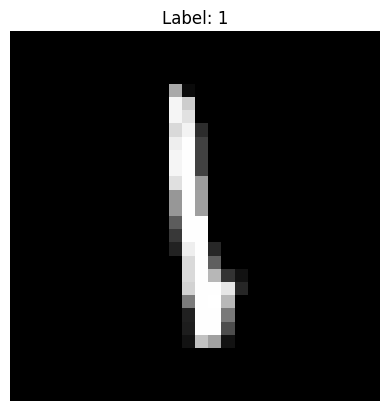

2025-01-31 13:38:44.813086: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [31]:
import matplotlib.pyplot as plt

# Get a single batch of images and labels
for images, labels in ds_train.take(1):  # Take one batch
    img = images[0].numpy()  # Take the first image
    label = labels[0].numpy()  # Take the first label

    # Display the image and label
    plt.imshow(img, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()


`sparse_categorical_crossentropy:` Works with integer labels (no need for manual one-hot encoding).<br>
`categorical_crossentropy:` Requires one-hot encoded labels.

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Flatten,Dropout,Lambda
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as k 

import matplotlib.pyplot as plt
from PIL import Image,ImageFont,ImageDraw

# Custom model creation

def create_model():
    input = keras.layers.Input(shape=(28,28),name='base_input')
    x = keras.layers.Flatten()(input)
    x = keras.layers.Dense(128,activation='relu',name = 'First_desnse_layer')(x)
    x = keras.layers.Dropout(0.1,name='First_dropout')(x)
    x = keras.layers.Dense(10,activation='softmax',name='Classification_layer')(x)
    
    return Model(inputs=input,outputs=x)

Network = create_model()    

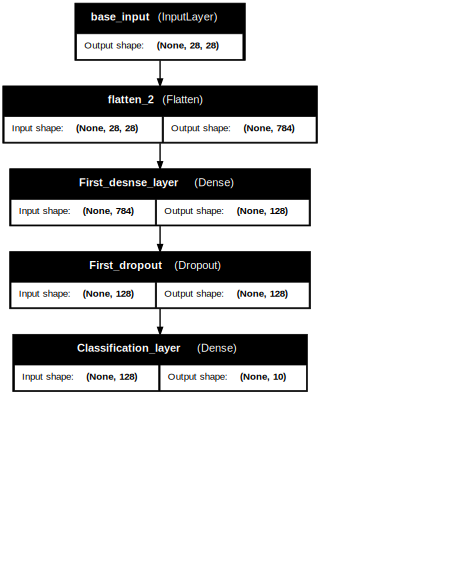

In [28]:
from tensorflow.keras.utils import model_to_dot
from IPython.display import SVG, display

# Create the DOT representation with smaller scaling
dot = model_to_dot(Network, show_shapes=True, show_layer_names=True)
dot.set('dpi', '50')  # Lower DPI for smaller image size

# Convert to SVG and display
svg = dot.create(prog='dot', format='svg')
display(SVG(svg))


In [37]:
from keras.losses import sparse_categorical_crossentropy
from keras.optimizers import Adam

Network.compile(
    loss=sparse_categorical_crossentropy,
    optimizer='adam',
    metrics = ['accuracy']
)

In [38]:
Network.fit(ds_train,epochs=5)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9774 - loss: 0.0757
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9817 - loss: 0.0608
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9838 - loss: 0.0522
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9852 - loss: 0.0478
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9882 - loss: 0.0407


In [33]:
loss,acc = Network.evaluate(ds_test)
print(f'Loss = {loss}')
print(f'Accuracy : {acc}')

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9747 - loss: 0.0788
Loss = 0.08097625523805618
Accuracy : 0.9757999777793884
